<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Model_2_Irving_Kfold_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
support2 = fetch_ucirepo(id=880)

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

In [ ]:
df['dzgroup'].value_counts()

ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: dzgroup, dtype: int64

## Initial Preprocessing

In [ ]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
ohe = pd.get_dummies(df[['dzgroup']])
df = df.drop(['dzgroup'], axis = 1)

X = df.copy()
y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

# scaling data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X.head()


,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,0.544507,1.0,0.0,0.00,0.333700,0.139860,0.0,0.0,0.538889,0.046591,...,0.048945,0.001590,0.060112,0.476923,0.675213,0.0,0.0,0.0,1.0,0.0
1,0.538672,1.0,1.0,0.00,0.164275,0.321678,0.0,0.0,0.433333,0.090846,...,0.153840,0.004769,0.081967,0.338462,0.699633,0.0,0.0,0.0,0.0,1.0
2,0.554409,0.0,1.0,0.26,0.398999,0.405594,0.0,0.0,0.383333,0.233711,...,0.087410,0.220986,0.153014,0.307692,0.661783,0.0,0.0,0.0,0.0,1.0
3,0.383276,0.0,0.0,0.00,0.311257,0.293706,0.0,0.0,0.372222,0.085416,...,0.055945,0.063587,0.027324,0.307692,0.599511,0.0,0.0,0.0,0.0,1.0
4,0.434763,1.0,1.0,0.00,0.132662,0.111888,0.0,0.0,0.744444,0.060566,...,0.118875,0.006359,0.038251,0.476923,0.575091,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head()

,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig
0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0


In [ ]:
y.shape

(3840, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

In [18]:
#oversampling

In [ ]:
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, random_state = 0,test_size = 0.1)

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score, cross_validate
import keras
import keras_tuner
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
def buildmodel():
    model = Sequential([
      Dense(units = 160, activation = 'mish', input_dim = X_train.shape[1]),
      Dense(units = 160, activation = 'mish'),
      Dense(units = 160, activation = 'mish'),
      Dense(units = 160, activation = 'mish'),
      Dense(units = y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['mse','accuracy'])
    return(model)

#epochs are the number of iterative training steps we do on the entire dataset, and each iteration is a step. batch_size is the number of datapoints we select per batch. total obs = batch_size * batches
estimator = KerasClassifier(model=buildmodel, epochs=20, batch_size=100, verbose=1) # before submitting please set verbose = 0, and rerun. If not grading will be no bueno!
kfold = RepeatedKFold(n_splits = 10, n_repeats = 5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1,scoring = 'accuracy')

Streaming output truncated to the last 5000 lines.
28/28 [==============================] - 0s 7ms/step - loss: 1.6819 - mse: 0.0920 - accuracy: 0.4522
Epoch 27/50
28/28 [==============================] - 0s 6ms/step - loss: 1.6807 - mse: 0.0919 - accuracy: 0.4522
Epoch 28/50
28/28 [==============================] - 0s 6ms/step - loss: 1.6794 - mse: 0.0919 - accuracy: 0.4522
Epoch 29/50
28/28 [==============================] - 0s 5ms/step - loss: 1.6782 - mse: 0.0918 - accuracy: 0.4522
Epoch 30/50
28/28 [==============================] - 0s 5ms/step - loss: 1.6770 - mse: 0.0918 - accuracy: 0.4522
Epoch 31/50
28/28 [==============================] - 0s 6ms/step - loss: 1.6758 - mse: 0.0917 - accuracy: 0.4522
Epoch 32/50
28/28 [==============================] - 0s 6ms/step - loss: 1.6746 - mse: 0.0917 - accuracy: 0.4522
Epoch 33/50
28/28 [==============================] - 0s 5ms/step - loss: 1.6734 - mse: 0.0916 - accuracy: 0.4522
Epoch 34/50
28/28 [==============================] - 0s 6

In [ ]:
avg_acc = results.mean()
avg_acc

0.4537717331528406

# Model 2
Hyperparameter Tuning

In [ ]:
!pip install keras-tuner -q


In [ ]:
def buildmodel():
    model = Sequential([
        Dense(units = 42, activation = 'tanh', input_dim = 24),
        Dense(units = 72, activation = 'tanh'),
        Dense(units = 72, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer ='SGD', loss='categorical_crossentropy')
    return(model)

In [ ]:
classifier = buildmodel()
history = classifier.fit(X_train.astype(float), y_train, batch_size = 20, validation_split=0.2, epochs = 100, verbose = 0)
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

24/24 [==============================] - 0s 1ms/step


array([[6.73783481e-01, 1.21219391e-02, 4.32429686e-02, ...,
        9.98968608e-04, 1.87793560e-03, 2.45554850e-01],
       [2.97273636e-01, 3.16914022e-01, 2.51783848e-01, ...,
        5.09661324e-02, 4.95047718e-02, 1.48460865e-02],
       [4.79271971e-02, 7.98424415e-04, 9.24094487e-03, ...,
        9.32477176e-01, 2.44270661e-03, 4.21928894e-03],
       ...,
       [6.17875576e-01, 1.80150270e-02, 6.78818300e-02, ...,
        3.72082065e-03, 1.09644588e-02, 2.32204467e-01],
       [1.67584807e-01, 3.36908735e-02, 1.89917207e-01, ...,
        1.40188355e-02, 4.31578994e-01, 1.00588866e-01],
       [5.73493898e-01, 8.47789738e-03, 2.85258330e-02, ...,
        1.41813261e-02, 3.60736661e-02, 2.90092558e-01]], dtype=float32)

In [ ]:
y_label = y_test.to_numpy()
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       344
           1       0.41      0.34      0.37       103
           2       0.35      0.44      0.39        84
           3       0.67      0.10      0.17        41
           4       0.00      0.00      0.00        16
           5       0.75      0.55      0.64        65
           6       0.39      0.41      0.40        46
           7       0.62      0.12      0.20        69

    accuracy                           0.54       768
   macro avg       0.47      0.34      0.36       768
weighted avg       0.54      0.54      0.50       768



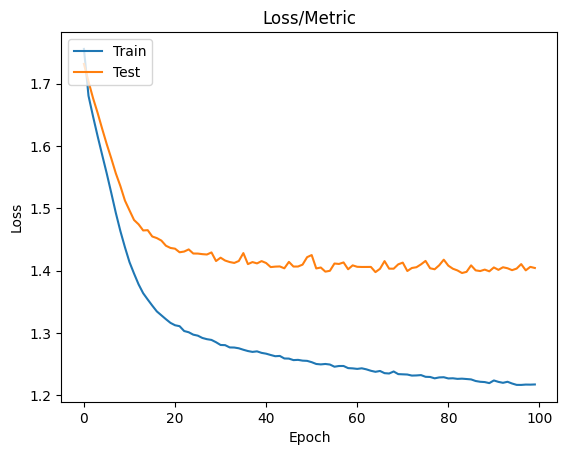

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import keras
import keras_tuner
from keras import layers
from keras.models import Sequential

def build_model(hp):
    model = keras.Sequential()
    # input layer
    actFunc = hp.Choice("activation", ['relu', 'sigmoid', 'tanh', 'softmax', 'leaky_relu', 'mish'])
    model.add(
        layers.Dense(units = hp.Int("units", min_value = 32, max_value = 512, step=64),
              activation = actFunc,
              input_dim = X.shape[1]
        )
    )
    # hidden layers
    for i in range(3):
      model.add(
          layers.Dense(
              units = hp.Int("units", min_value = 32, max_value = 512, step=64),
              activation = actFunc,
          )
      )
    # output layer
    model.add(
          layers.Dense(
              units = 8,
              activation = 'softmax',

          )
      )
    loss = hp.Choice("loss", values = ["categorical_crossentropy", "mse", "binary_crossentropy"])
    learning_rate = hp.Float("lr", min_value = 1e-4, max_value = 1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ["accuracy"],
    )
    return model

hp = keras_tuner.HyperParameters()
build_model(hp)

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel= build_model,
    objective="val_accuracy",
    max_trials=5,
    seed=15,
    executions_per_trial=5,
    max_consecutive_failed_trials=5
)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train_2, y_train_2, epochs = 100, validation_data = (X_val, y_val), verbose = 1)

## Model Summary


In [ ]:
print("Best hyperparameters and best accuracy (score):")
tuner.results_summary(num_trials=1)

Best hyperparameters and best accuracy (score):
Results summary
Results in ./untitled_project
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
activation: mish
units: 160
loss: mse
lr: 0.0002304250692421976
optimizer: rmsprop
Score: 0.5435064911842347


In [ ]:
models = tuner.get_best_models(num_models=1)
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               4000      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 160)               25760     
                                                                 
 dense_3 (Dense)             (None, 160)               25760     
                                                                 
 dense_4 (Dense)             (None, 8)                 1288      
                                                                 
Total params: 82568 (322.53 KB)
Trainable params: 82568 (322.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
max_acc = models[0].evaluate(X_test,y_test)
print(max_acc)

24/24 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.5091
[0.08129136264324188, 0.5091145634651184]


In [ ]:
yhat_test = models[0].predict(X_test.astype(float))
y_label = y_test.to_numpy()
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.53      0.88      0.67       331
           1       0.50      0.34      0.40       109
           2       0.35      0.13      0.19        90
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        25
           5       0.61      0.58      0.60        48
           6       0.32      0.45      0.38        49
           7       0.50      0.02      0.03        66

    accuracy                           0.51       768
   macro avg       0.35      0.30      0.28       768
weighted avg       0.44      0.51      0.43       768



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
